<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/19_Exponentially_weighted_moving_avg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/jay-kanakia/Deep-Learning-CampusX/refs/heads/main/Datasets/DailyDelhiClimateTest.csv')

In [2]:
df.sample(2)

,date,meantemp,humidity,wind_speed,meanpressure
101,2017-04-12,29.25,26.00,9.4875,1005.875
91,2017-04-02,29.75,33.75,9.2625,1004.250


In [4]:
df.drop(columns=['humidity','wind_speed','meanpressure'],inplace=True)

In [5]:
df.sample(1)

,date,meantemp
110,2017-04-21,34.25


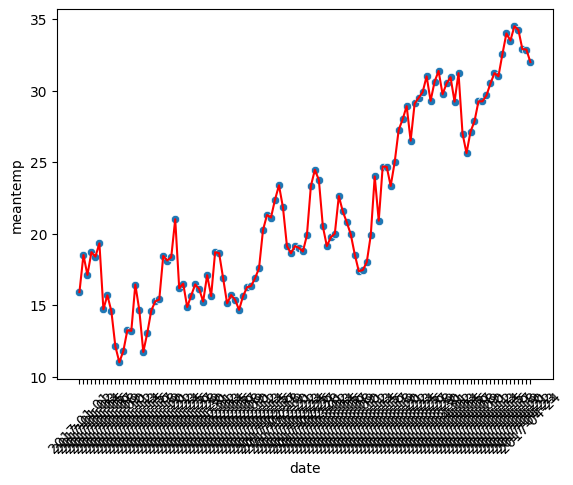

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='date',y='meantemp',data=df)
sns.lineplot(df['meantemp'],c='red')
plt.xticks(rotation=45)
plt.show()

In [16]:
df['ewma']=df['meantemp'].ewm(alpha=0.1,adjust=False).mean()

In [28]:
df.head(11)

,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,18.241304
2,2017-01-03,17.111111,17.224130
3,2017-01-04,18.700000,18.552413
4,2017-01-05,18.388889,18.405241
5,2017-01-06,19.318182,19.226888
6,2017-01-07,14.708333,15.160189
7,2017-01-08,15.684211,15.631808
8,2017-01-09,14.571429,14.677467
9,2017-01-10,12.111111,12.367747


In [29]:
np.mean(df['meantemp'][:11])

np.float64(16.00057353078468)

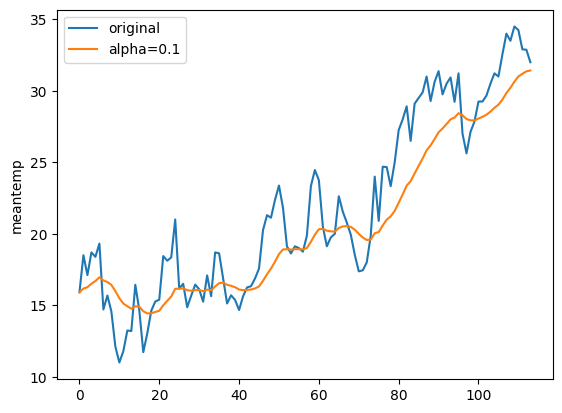

In [18]:
sns.lineplot(df['meantemp'],label='original')
sns.lineplot(df['ewma'],label='alpha=0.1')
plt.legend()
plt.show()

In [26]:
def ewma(alpha=0.1):
  df['ewma']=df['meantemp'].ewm(alpha=alpha,adjust=False).mean()
  sns.lineplot(df['meantemp'],label='original')
  sns.lineplot(df['ewma'],label=f'alpha={alpha}')
  plt.legend()
  plt.show()

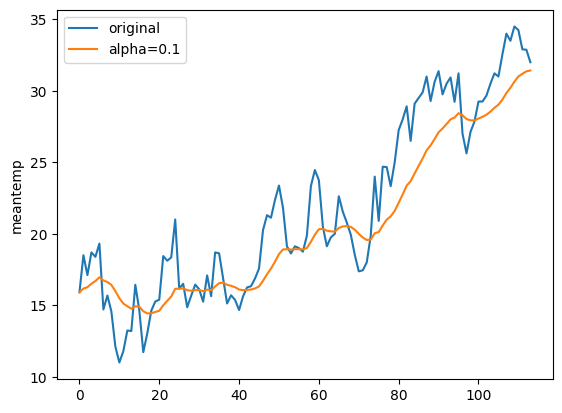

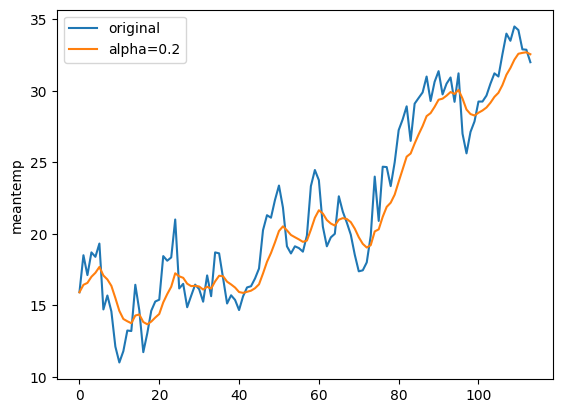

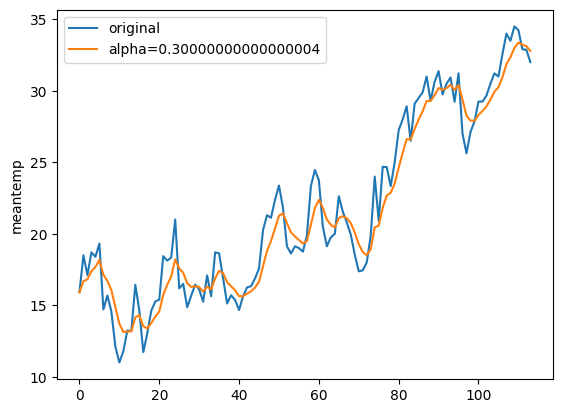

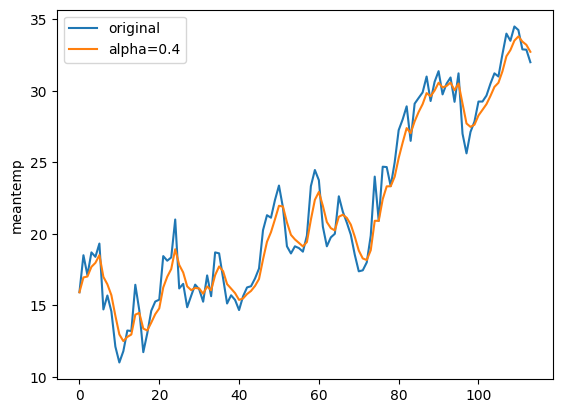

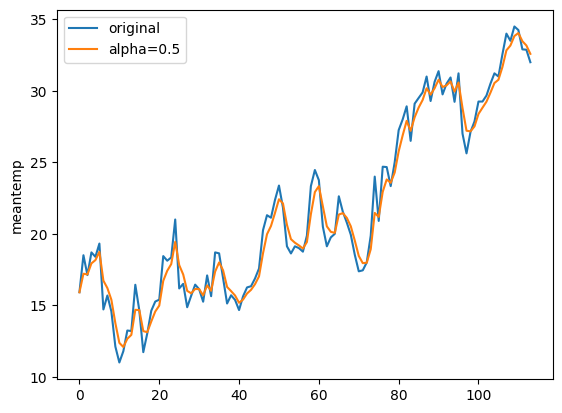

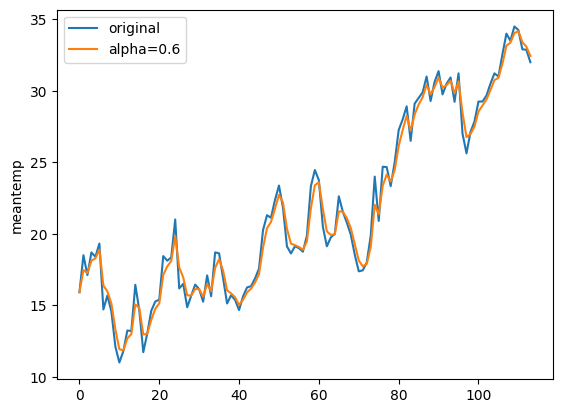

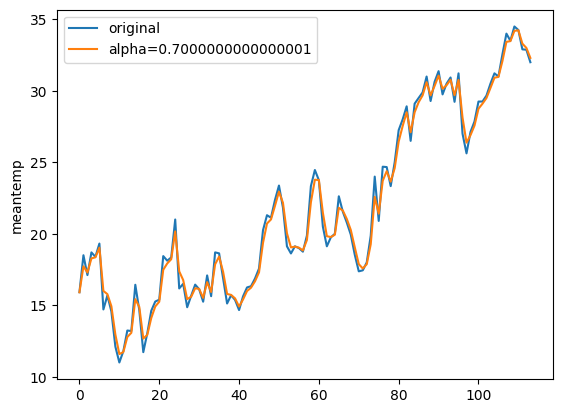

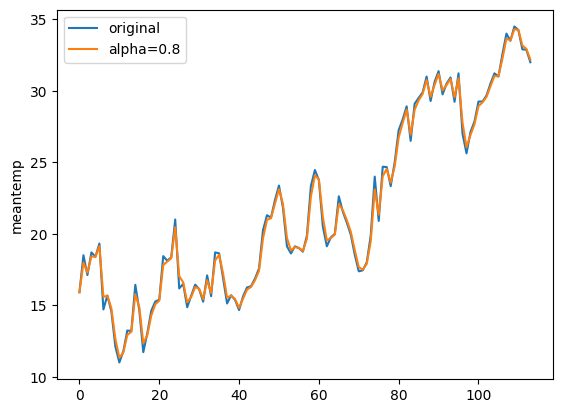

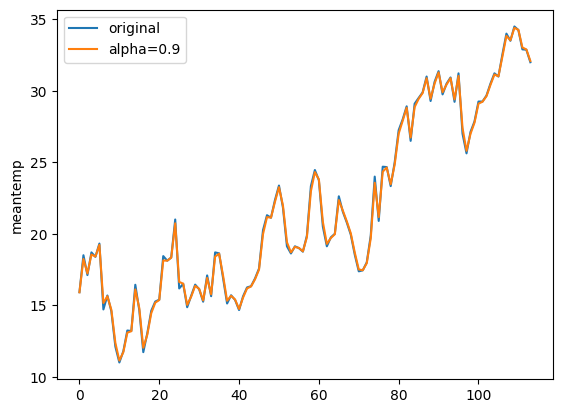

In [27]:
import numpy as np
for i in np.arange(0.1,1,0.1):
  ewma(alpha=i)

In [34]:
# Wrong

In [30]:
def exponential_weighted_avg(value,alpha=0.1):
  temp=0
  temp=temp*(1-alpha)+(value*alpha)
  return temp

In [32]:
df['manual_cal']=df['meantemp'].apply(exponential_weighted_avg)

In [33]:
df

,date,meantemp,ewma,manual_cal
0,2017-01-01,15.913043,15.913043,1.591304
1,2017-01-02,18.500000,18.241304,1.850000
2,2017-01-03,17.111111,17.224130,1.711111
3,2017-01-04,18.700000,18.552413,1.870000
4,2017-01-05,18.388889,18.405241,1.838889
...,...,...,...,...
109,2017-04-20,34.500000,34.403401,3.450000
110,2017-04-21,34.250000,34.265340,3.425000
111,2017-04-22,32.900000,33.036534,3.290000
112,2017-04-23,32.875000,32.891153,3.287500


In [35]:
#Correct : ChatGpt

In [36]:
def exponential_weighted_avg(prev_ewma, value, alpha=0.1):
    return alpha * value + (1 - alpha) * prev_ewma

In [37]:
ewma = df['meantemp'][0]
for v in df['meantemp'][1:]:
    ewma = exponential_weighted_avg(ewma, v)


In [38]:
ewma

np.float64(31.423398396906972)